In [10]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# import torch

**ML problem types:**
Supervised Machine Learning,
Unsupervised Machine Learning,
Reinforcement Learning

Supervised Machine Learning deal with labeled data and can be divided into classification (logistic) and regression.

Unsupervised Machine Learning deal with un-labeled data. Examples are clustering and PCA (principal component analysis).

Reinforcement Learning is to train an agent to make the correct decision or act correctly through trial and error, where there is rewards for good results and maybe punishment or less rewards for less satisfactory results.

I am mostly interested in learning Supervised Machine Learning.

**Regression vs Classification.**

Classification is used to predict categorical labels, eg is this cancer or not cancer? Is this spam or not spam? Is this a cat, dog or a bird?

Regression is used to predict continuous  numerical values, eg the cost of a house depending on the number of rooms and living area (m2), or the coffee yield depending on maybe temperature, altitude and amount of rain.

**Bias-Variance Trade-off.**

Error can come from biass and variance.
Bias is when a model is oversimplified, causing underfitting. The model is too simple to accurately describe the problem.

Variance is when the model is too complex and the model is overfitting to the training-data, thus performing badly on test data.

A simple model has high bias and low variance, while a complex model has low bias and high variance. The goal is to find a balance (tradeoff) that minimized the total error from both bias and variance.

In [12]:
# Import California Housing Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:", california_housing.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = sum((y_test-predictions)**2)/len(y_test)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Dataset shape: (20640, 8)
Target shape: (20640,)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Root Mean Squared Error: 0.7455813830127739


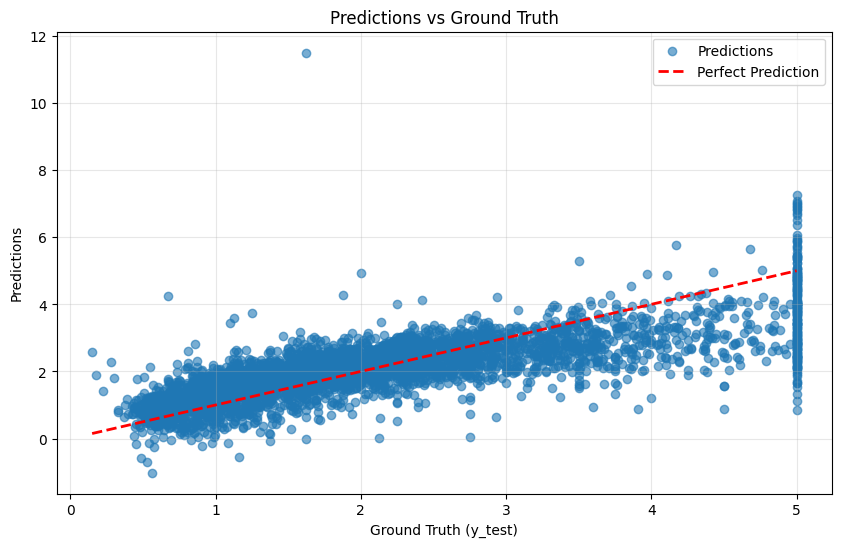

In [13]:
# Plot Predictions vs Ground Truth
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Ground Truth (y_test)')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

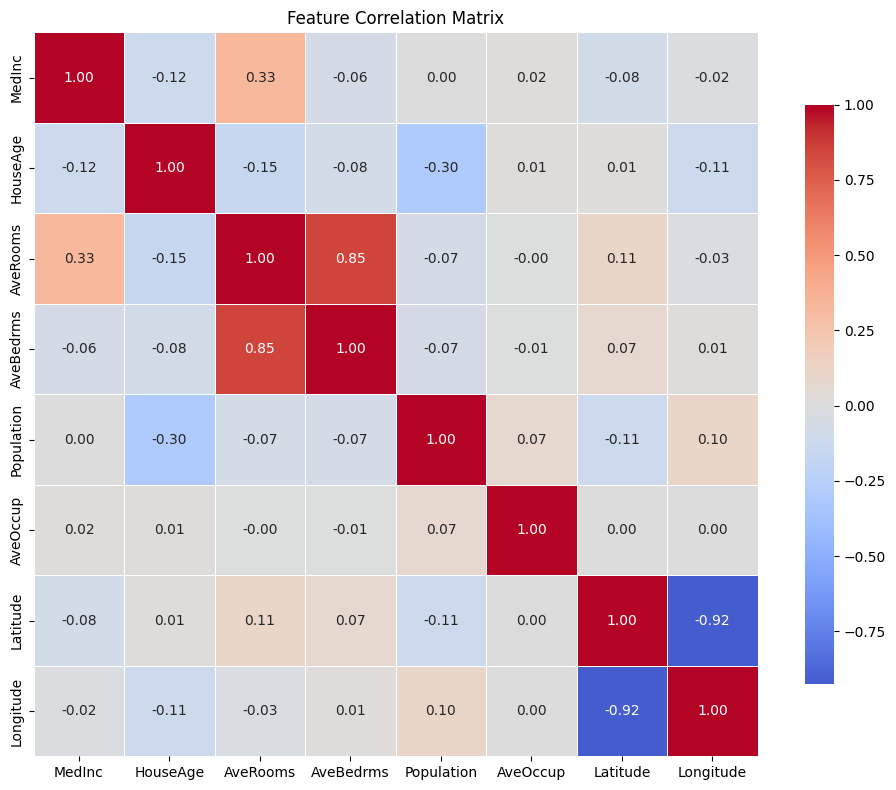

In [14]:
# Feature Correlation Analysis
# Create a DataFrame with features for easier correlation calculation
X_df = pd.DataFrame(X, columns=california_housing.feature_names)

# Calculate correlation matrix
correlation_matrix = X_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display the correlation matrix
#print("Correlation Matrix:")
#print(correlation_matrix)

**Correlation Matrix**

The correlation matrix above shows that I could likely drop either latitude or longitude without affecting the model much, I could also drop either number of rooms or number of bedrooms as they are also highly correlated.

Model Coefficients (Intercept): -37.0233

Feature Coefficients:
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
7   Longitude    -0.433708
6    Latitude    -0.419792
2    AveRooms    -0.123323
1    HouseAge     0.009724
5    AveOccup    -0.003526
4  Population    -0.000002


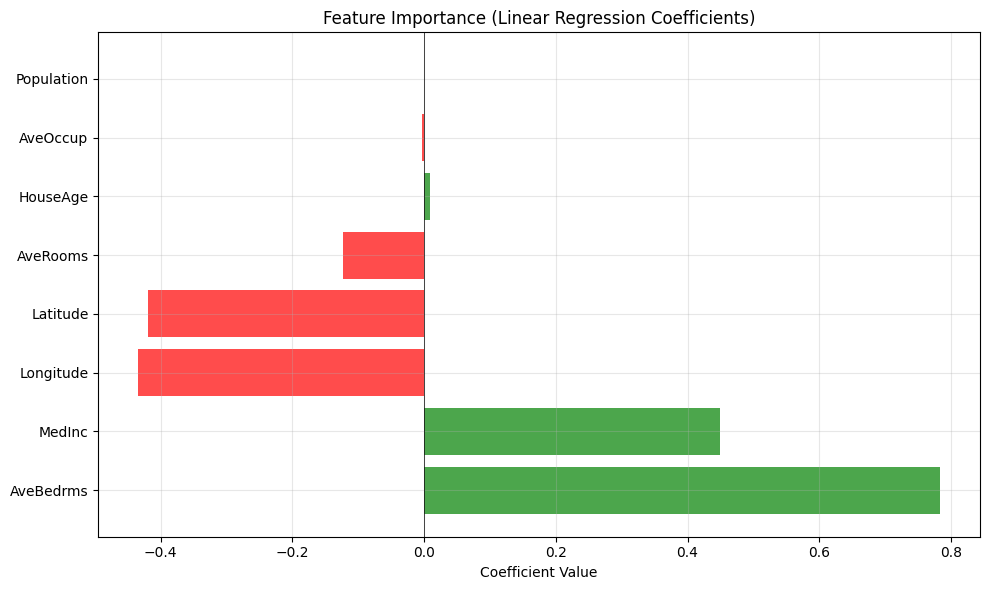

In [18]:
# Feature Importance (Model Coefficients)
# Get coefficients from the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': california_housing.feature_names,
    'Coefficient': coefficients
})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

print(f"Model Coefficients (Intercept): {intercept:.4f}")
print("\nFeature Coefficients:")
print(coef_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Impact of features on house-prices**

The graph above shows that the features AveOccup, Population and HouseAge has little impact on house prices and they can thus be dropped

In [19]:
# Simplification - Drop less important features
# Features to drop: Population, AveOccup, HouseAge
features_to_drop = ['Population', 'AveOccup', 'HouseAge']

# Create new feature dataframe by dropping specified features
X_simplified = X_df.drop(columns=features_to_drop)
print("Original features:", X_df.columns.tolist())
print("Simplified features:", X_simplified.columns.tolist())
print(f"\nDropped {len(features_to_drop)} features: {features_to_drop}")
print(f"Reduced from {X_df.shape[1]} to {X_simplified.shape[1]} features")

# Split the simplified dataset
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simplified, y, test_size=0.2, random_state=42)

# Train model with simplified features
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)
predictions_simple = model_simple.predict(X_test_simple)

# Calculate metrics for simplified model
rmse_simple = np.sqrt(sum((y_test_simple - predictions_simple)**2) / len(y_test_simple))

print("\n--- Simplified Model Performance ---")
print(f"RMSE: {rmse_simple:.4f}")
print("\n--- Comparison ---")
print(f"Original RMSE: {rmse:.4f}")
print(f"Simplified RMSE: {rmse_simple:.4f}")

Original features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Simplified features: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

Dropped 3 features: ['Population', 'AveOccup', 'HouseAge']
Reduced from 8 to 5 features

--- Simplified Model Performance ---
RMSE: 0.7528

--- Comparison ---
Original RMSE: 0.7456
Simplified RMSE: 0.7528


**Clean Dataset**

I also want to clean the dataset, but I wont do that here.
Data cleaning is a step in machine learning (ML) which involves identifying and removing any missing, duplicate or irrelevant data. The goal of data cleaning is to ensure that the data is accurate, consistent and free of errors.

Original features: 8
Polynomial features: 44

--- RMSE Comparison ---
Original Linear Regression (Degree 1): 0.7456
Polynomial Regression (Degree 2): 0.6814

Top 15 Most Important Features for polynomial regression degree 2 (by absolute coefficient):
                Feature  Coefficient
3             AveBedrms   -38.323120
0                MedInc   -11.936768
6              Latitude     8.284640
2              AveRooms     7.884154
7             Longitude     5.709792
5              AveOccup     1.017431
1              HouseAge    -0.842630
32   AveBedrms Latitude    -0.528063
33  AveBedrms Longitude    -0.486724
29          AveBedrms^2     0.264009
14      MedInc Latitude    -0.163992
15     MedInc Longitude    -0.153483
11     MedInc AveBedrms    -0.145653
27    AveRooms Latitude     0.106560
24   AveRooms AveBedrms    -0.105964


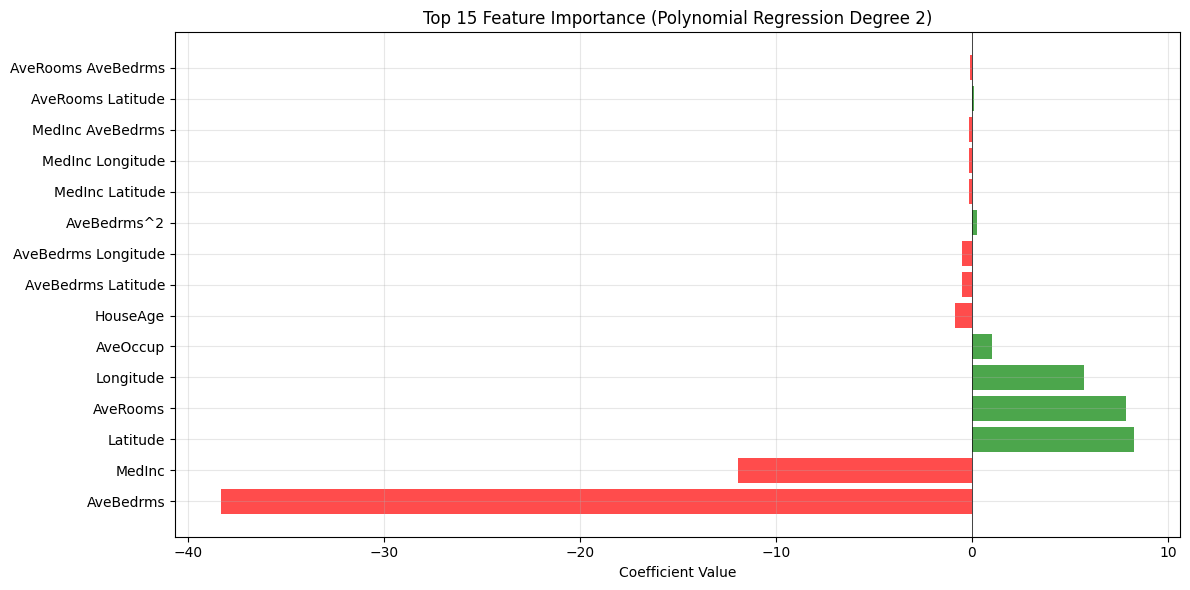

In [25]:
# Polynomial Regression with Feature Importance
from sklearn.preprocessing import PolynomialFeatures

# Split data
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_pol)
X_test_poly = poly.transform(X_test_pol)

print(f"Original features: {X_train_pol.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")

# Train polynomial model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_pol)
poly_predictions = poly_model.predict(X_test_poly)

# Calculate metrics
poly_rmse = np.sqrt(sum((y_test_pol - poly_predictions)**2) / len(y_test_pol))
print("\n--- RMSE Comparison ---")
print(f"Original Linear Regression (Degree 1): {rmse:.4f}")
print(f"Polynomial Regression (Degree 2): {poly_rmse:.4f}")

# Get feature names and coefficients
feature_names = poly.get_feature_names_out(california_housing.feature_names)
coef_poly_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': poly_model.coef_
})
coef_poly_df['Abs_Coefficient'] = coef_poly_df['Coefficient'].abs()
coef_poly_df = coef_poly_df.sort_values('Abs_Coefficient', ascending=False).head(15)

print("\nTop 15 Most Important Features for polynomial regression degree 2 (by absolute coefficient):")
print(coef_poly_df[['Feature', 'Coefficient']])

# Plot top features
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in coef_poly_df['Coefficient']]
plt.barh(coef_poly_df['Feature'], coef_poly_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Importance (Polynomial Regression Degree 2)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

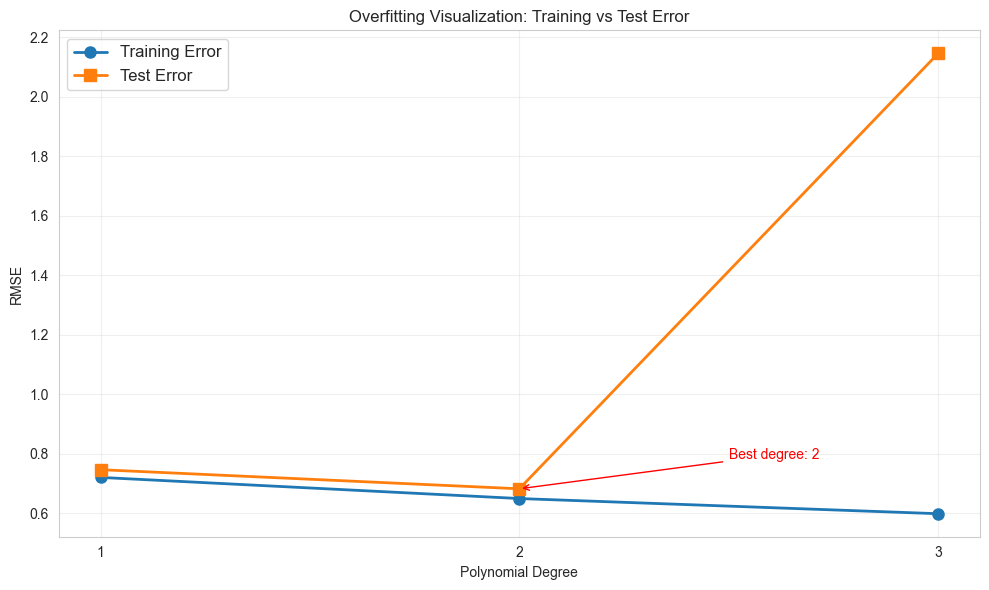

Polynomial Degree | Training RMSE | Test RMSE
---------------------------------------------
        1         |    0.7197     |    0.7456    
        2         |    0.6486     |    0.6814    
        3         |    0.5976     |    2.1451    

Best degree (lowest test error): 2
Best test RMSE: 0.6814


In [ ]:
# Overfitting Visualization
# Train models with different polynomial degrees and track training vs test error

degrees = range(1, 4)
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly_temp = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_temp = poly_temp.fit_transform(X_train)
    X_test_temp = poly_temp.transform(X_test)
    
    # Train model
    model_temp = LinearRegression()
    model_temp.fit(X_train_temp, y_train)
    
    # Calculate errors
    y_train_pred = model_temp.predict(X_train_temp)
    y_test_pred = model_temp.predict(X_test_temp)
    
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
    
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Plot overfitting visualization
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, marker='o', label='Training Error', linewidth=2, markersize=8)
plt.plot(degrees, test_errors, marker='s', label='Test Error', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Overfitting Visualization: Training vs Test Error')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(degrees)

# Annotate the point where overfitting starts
best_degree = np.argmin(test_errors) + 1
plt.annotate(f'Best degree: {best_degree}', 
             xy=(best_degree, test_errors[best_degree-1]),
             xytext=(best_degree+0.5, test_errors[best_degree-1]+0.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("Polynomial Degree | Training RMSE | Test RMSE")
print("-" * 45)
for i, degree in enumerate(degrees):
    print(f"{degree:^17} | {train_errors[i]:^13.4f} | {test_errors[i]:^13.4f}")

print(f"\nBest degree (lowest test error): {best_degree}")
print(f"Best test RMSE: {min(test_errors):.4f}")

**Why do regression models fail?**

They can fail due to underfitting, when the model is to simple to accurately describe a problem
They can fail due to overfitting, when the model is very complex and detailed perfectly fitting the training data, but do not fit the test data. They can fail due to data outliers.
Or by missing a key variable (this is underfitting in a way).
Also the wrong model might be chosen for the data.
Data leakage may make it look like the model works, but it doesnt. This is caused by data outside the training set being used to create the model.
Models might also fail due to core asssumptions used when creating the model being wrong, eg linearity, independence or constant variance.
Models might also fail due to collinearity, when features are highly correlated.
Another issue might be a dataset that is not properly cleaned.

**Ridge vs Lasso Theory**

Both Ridge and Lasso theory is about preventing overfitting by including a penalty term to the loss function. Lasso theory adds a pentalty function that is proportional to the absolute value of coefficients (weights), while Ridge theory adds a penalty function proportional to the square of coefficients.
Ridge theory will shrink the coefficients towards zero, but never eliminate the coefficients entirely.
Lasso theory may shrink coefficients to exactly zero, thus performing automatic feature selection by removing features.



**Ridge Theory**

Ridge regression is a regularization technique that adds a penalty term to the loss function to prevent overfitting.

$$\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} w_i^2$$

Where:
- **MSE** = Mean Squared Error
- **λ (lambda)** = regularization parameter that controls the strength of the penalty
- **wᵢ** = model weights/coefficients
- **Σ(wᵢ²)** = sum of squared weights (L2 penalty)

A higher λ value increases the penalty, forcing the model to have smaller weights and simpler predictions, which helps reduce overfitting.

**Lasso Theory**

Lasso (Least Absolute Shrinkage and Selection Operator) is another regularization technique that adds a penalty term to prevent overfitting, similar to Ridge but with a key difference.

$$\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} |w_i|$$

Where:
- **MSE** = Mean Squared Error
- **λ (lambda)** = regularization parameter that controls the strength of the penalty
- **wᵢ** = model weights/coefficients
- **Σ|wᵢ|** = sum of absolute values of weights (L1 penalty)

**Key Difference from Ridge:**
- Lasso uses the **L1 penalty** (absolute values) instead of L2 (squared values)
- This causes Lasso to shrink some coefficients to exactly zero, performing **feature selection**
- Ridge shrinks coefficients but rarely sets them to zero
- Lasso is useful when you want to identify which features are most important and eliminate irrelevant ones

Ridge Regression Results
Alpha | Train RMSE | Test RMSE
--------------------------------------------------
 0.001 |     0.7197 |    0.7456
 0.005 |     0.7197 |    0.7456
 0.007 |     0.7197 |    0.7456
 0.010 |     0.7197 |    0.7456
 0.020 |     0.7197 |    0.7456
 0.050 |     0.7197 |    0.7456
 0.100 |     0.7197 |    0.7456
 1.000 |     0.7197 |    0.7455
10.000 |     0.7197 |    0.7450
100.000 |     0.7201 |    0.7414
200.000 |     0.7209 |    0.7393
300.000 |     0.7219 |    0.7383
500.000 |     0.7237 |    0.7377
700.000 |     0.7254 |    0.7379
1000.000 |     0.7278 |    0.7390
2000.000 |     0.7348 |    0.7439
5000.000 |     0.7516 |    0.7587
10000.000 |     0.7721 |    0.7774

Best alpha: 500
Best test RMSE: 0.7377


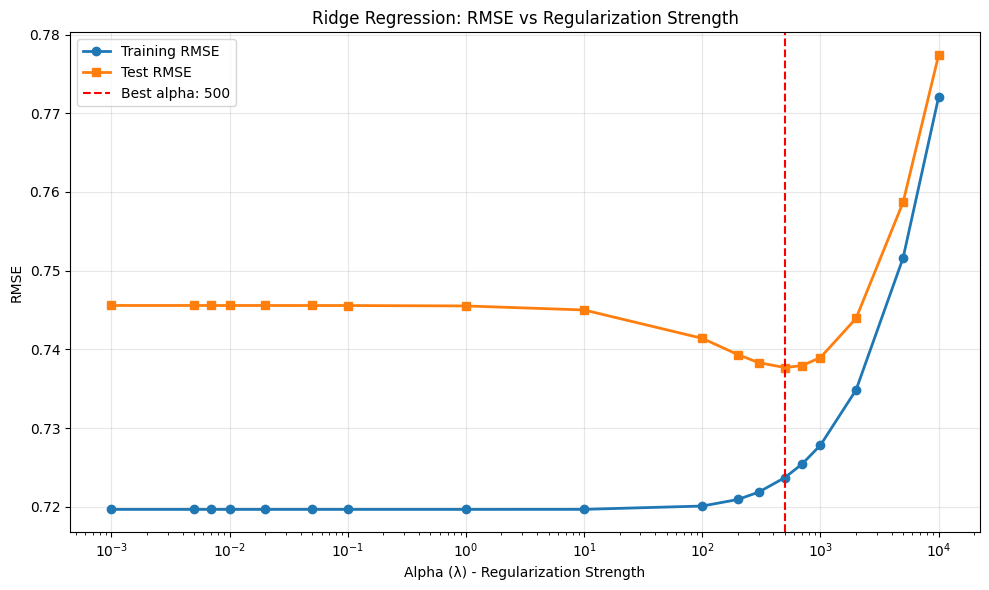

In [26]:
# Ridge Regression Implementation
from sklearn.linear_model import Ridge

# Train Ridge regression model with different lambda values
alphas = [0.001, 0.005, 0.007, 0.01, 0.02, 0.05, 0.1, 1, 10, 100, 200,300, 500, 700, 1000, 2000, 5000,10000]
ridge_models = []
ridge_rmse_train = []
ridge_rmse_test = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_models.append(ridge)
    
    # Predictions
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    # Calculate RMSE
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
    
    ridge_rmse_train.append(train_rmse)
    ridge_rmse_test.append(test_rmse)

# Find best alpha
best_alpha_idx = np.argmin(ridge_rmse_test)
best_alpha = alphas[best_alpha_idx]
best_ridge_model = ridge_models[best_alpha_idx]

print("Ridge Regression Results")
print("=" * 50)
print("Alpha | Train RMSE | Test RMSE")
print("-" * 50)
for i, alpha in enumerate(alphas):
    print(f"{alpha:>6.3f} | {ridge_rmse_train[i]:>10.4f} | {ridge_rmse_test[i]:>9.4f}")

print(f"\nBest alpha: {best_alpha}")
print(f"Best test RMSE: {ridge_rmse_test[best_alpha_idx]:.4f}")

# Plot Ridge RMSE vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_rmse_train, marker='o', label='Training RMSE', linewidth=2)
plt.plot(alphas, ridge_rmse_test, marker='s', label='Test RMSE', linewidth=2)
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best alpha: {best_alpha}')
plt.xlabel('Alpha (λ) - Regularization Strength')
plt.ylabel('RMSE')
plt.title('Ridge Regression: RMSE vs Regularization Strength')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Lasso Regression Results
Alpha | Train RMSE | Test RMSE | Non-Zero Coefficients
------------------------------------------------------------
 0.001 |     0.7197 |    0.7442 |                   8
 0.005 |     0.7207 |    0.7401 |                   8
 0.007 |     0.7216 |    0.7388 |                   8
 0.010 |     0.7236 |    0.7379 |                   8
 0.020 |     0.7314 |    0.7402 |                   7
 0.050 |     0.7440 |    0.7514 |                   6
 0.100 |     0.7765 |    0.7833 |                   6
 1.000 |     0.9739 |    0.9685 |                   3
10.000 |     1.1558 |    1.1447 |                   1
100.000 |     1.1562 |    1.1449 |                   0
200.000 |     1.1562 |    1.1449 |                   0
300.000 |     1.1562 |    1.1449 |                   0
500.000 |     1.1562 |    1.1449 |                   0
700.000 |     1.1562 |    1.1449 |                   0
1000.000 |     1.1562 |    1.1449 |                   0
2000.000 |     1.1562 |    1.1449 |       

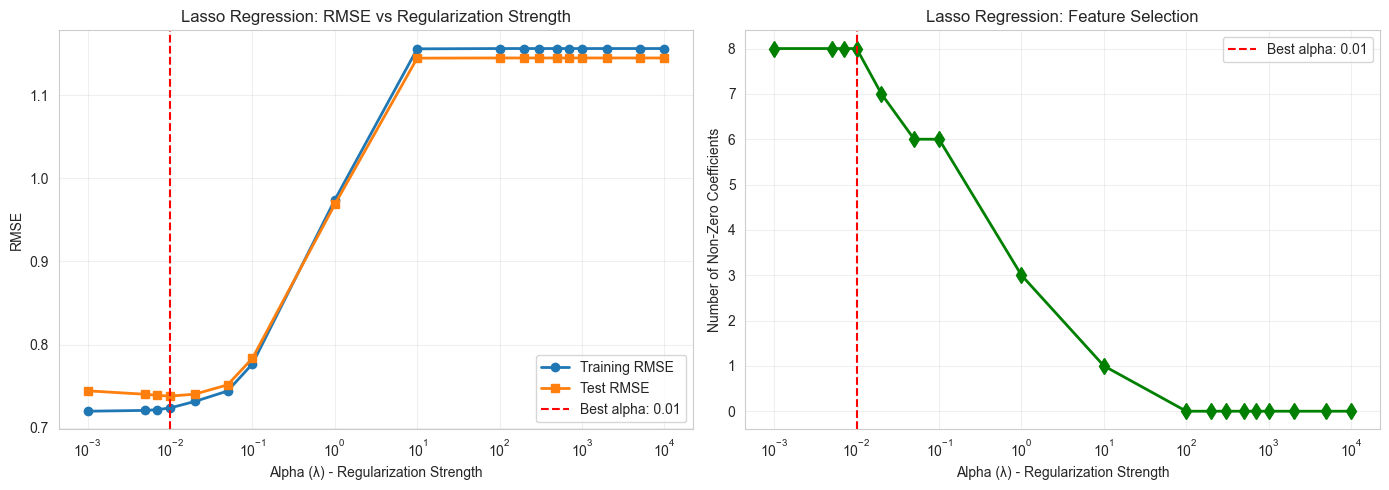


COMPARISON: Linear vs Ridge vs Lasso
Linear Regression Test RMSE:  0.7456
Ridge Regression Test RMSE:   0.7377 (alpha=500)
Lasso Regression Test RMSE:   0.7379 (alpha=0.01)


In [ ]:
# Lasso Regression Implementation
from sklearn.linear_model import Lasso

# Train Lasso regression model with different lambda values
lasso_models = []
lasso_rmse_train = []
lasso_rmse_test = []
lasso_non_zero_coef = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_models.append(lasso)
    
    # Predictions
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    # Calculate RMSE
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
    
    lasso_rmse_train.append(train_rmse)
    lasso_rmse_test.append(test_rmse)
    
    # Count non-zero coefficients (feature selection)
    non_zero = np.sum(lasso.coef_ != 0)
    lasso_non_zero_coef.append(non_zero)

# Find best alpha
best_alpha_lasso_idx = np.argmin(lasso_rmse_test)
best_alpha_lasso = alphas[best_alpha_lasso_idx]
best_lasso_model = lasso_models[best_alpha_lasso_idx]

print("Lasso Regression Results")
print("=" * 60)
print("Alpha | Train RMSE | Test RMSE | Non-Zero Coefficients")
print("-" * 60)
for i, alpha in enumerate(alphas):
    print(f"{alpha:>6.3f} | {lasso_rmse_train[i]:>10.4f} | {lasso_rmse_test[i]:>9.4f} | {lasso_non_zero_coef[i]:>19}")

print(f"\nBest alpha: {best_alpha_lasso}")
print(f"Best test RMSE: {lasso_rmse_test[best_alpha_lasso_idx]:.4f}")
print(f"Features selected (non-zero coefficients): {lasso_non_zero_coef[best_alpha_lasso_idx]} out of {X_train.shape[1]}")

# Plot Lasso RMSE vs Alpha
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# RMSE plot
ax1.plot(alphas, lasso_rmse_train, marker='o', label='Training RMSE', linewidth=2)
ax1.plot(alphas, lasso_rmse_test, marker='s', label='Test RMSE', linewidth=2)
ax1.axvline(x=best_alpha_lasso, color='red', linestyle='--', label=f'Best alpha: {best_alpha_lasso}')
ax1.set_xlabel('Alpha (λ) - Regularization Strength')
ax1.set_ylabel('RMSE')
ax1.set_title('Lasso Regression: RMSE vs Regularization Strength')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Non-zero coefficients plot
ax2.plot(alphas, lasso_non_zero_coef, marker='d', color='green', linewidth=2, markersize=8)
ax2.axvline(x=best_alpha_lasso, color='red', linestyle='--', label=f'Best alpha: {best_alpha_lasso}')
ax2.set_xlabel('Alpha (λ) - Regularization Strength')
ax2.set_ylabel('Number of Non-Zero Coefficients')
ax2.set_title('Lasso Regression: Feature Selection')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare Ridge vs Lasso vs Linear
print("\n" + "=" * 60)
print("COMPARISON: Linear vs Ridge vs Lasso")
print("=" * 60)
print(f"Linear Regression Test RMSE:  {rmse:.4f}")
print(f"Ridge Regression Test RMSE:   {ridge_rmse_test[best_alpha_idx]:.4f} (alpha={best_alpha})")
print(f"Lasso Regression Test RMSE:   {lasso_rmse_test[best_alpha_lasso_idx]:.4f} (alpha={best_alpha_lasso})")

Polynomial features created: 44 features from 8 original features


C:\Users\sanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.54732e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.49018e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.96169e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sanna\AppData\Lo


Ridge Regression (Polynomial Degree 2) Results
Alpha | Train RMSE | Test RMSE
--------------------------------------------------
 0.001 |     0.6486 |    0.6794
 0.005 |     0.6487 |    0.6733
 0.007 |     0.6487 |    0.6710
 0.010 |     0.6488 |    0.6682
 0.020 |     0.6490 |    0.6626
 0.050 |     0.6496 |    0.6579
 0.100 |     0.6501 |    0.6577
 1.000 |     0.6522 |    0.6650
10.000 |     0.6585 |    0.6769
100.000 |     0.6625 |    0.6852
200.000 |     0.6633 |    0.6869
300.000 |     0.6638 |    0.6874
500.000 |     0.6644 |    0.6871
700.000 |     0.6648 |    0.6864
1000.000 |     0.6652 |    0.6852
2000.000 |     0.6661 |    0.6824
5000.000 |     0.6671 |    0.6795
10000.000 |     0.6677 |    0.6785

Best alpha: 0.1
Best test RMSE: 0.6577


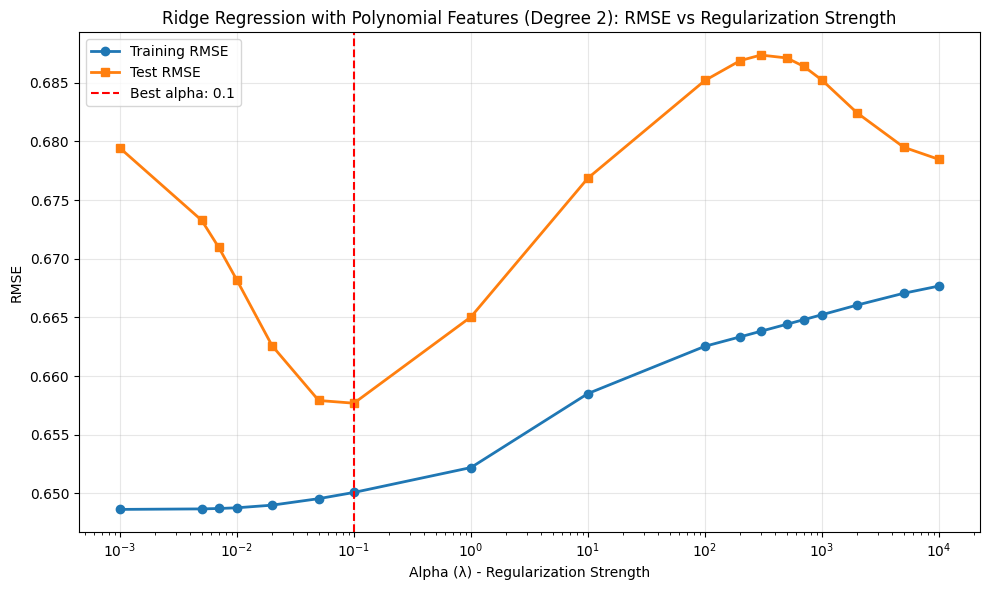


COMPARISON: Linear Ridge vs Polynomial Ridge (Degree 2)
Linear Ridge Test RMSE:       0.7377 (alpha=500)
Polynomial Ridge Test RMSE:   0.6577 (alpha=0.1)


In [27]:
# Ridge Regression with Polynomial Features (Degree 2)
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2)
poly_ridge = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_ridge = poly_ridge.fit_transform(X_train)
X_test_poly_ridge = poly_ridge.transform(X_test)

print(f"Polynomial features created: {X_train_poly_ridge.shape[1]} features from {X_train.shape[1]} original features")

# Train Ridge regression model with different lambda values
ridge_poly_models = []
ridge_poly_rmse_train = []
ridge_poly_rmse_test = []

for alpha in alphas:
    ridge_poly = Ridge(alpha=alpha)
    ridge_poly.fit(X_train_poly_ridge, y_train)
    ridge_poly_models.append(ridge_poly)
    
    # Predictions
    y_train_pred = ridge_poly.predict(X_train_poly_ridge)
    y_test_pred = ridge_poly.predict(X_test_poly_ridge)
    
    # Calculate RMSE
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
    
    ridge_poly_rmse_train.append(train_rmse)
    ridge_poly_rmse_test.append(test_rmse)

# Find best alpha
best_alpha_poly_idx = np.argmin(ridge_poly_rmse_test)
best_alpha_poly = alphas[best_alpha_poly_idx]
best_ridge_poly_model = ridge_poly_models[best_alpha_poly_idx]

print("\nRidge Regression (Polynomial Degree 2) Results")
print("=" * 50)
print("Alpha | Train RMSE | Test RMSE")
print("-" * 50)
for i, alpha in enumerate(alphas):
    print(f"{alpha:>6.3f} | {ridge_poly_rmse_train[i]:>10.4f} | {ridge_poly_rmse_test[i]:>9.4f}")

print(f"\nBest alpha: {best_alpha_poly}")
print(f"Best test RMSE: {ridge_poly_rmse_test[best_alpha_poly_idx]:.4f}")

# Plot Ridge with Polynomial Features RMSE vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_poly_rmse_train, marker='o', label='Training RMSE', linewidth=2)
plt.plot(alphas, ridge_poly_rmse_test, marker='s', label='Test RMSE', linewidth=2)
plt.axvline(x=best_alpha_poly, color='red', linestyle='--', label=f'Best alpha: {best_alpha_poly}')
plt.xlabel('Alpha (λ) - Regularization Strength')
plt.ylabel('RMSE')
plt.title('Ridge Regression with Polynomial Features (Degree 2): RMSE vs Regularization Strength')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Comparison
print("\n" + "=" * 60)
print("COMPARISON: Linear Ridge vs Polynomial Ridge (Degree 2)")
print("=" * 60)
print(f"Linear Ridge Test RMSE:       {ridge_rmse_test[best_alpha_idx]:.4f} (alpha={best_alpha})")
print(f"Polynomial Ridge Test RMSE:   {ridge_poly_rmse_test[best_alpha_poly_idx]:.4f} (alpha={best_alpha_poly})")

Polynomial features created: 44 features from 8 original features


C:\Users\sanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.660e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.698e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac


Lasso Regression (Polynomial Degree 2) Results
Alpha | Train RMSE | Test RMSE | Non-Zero Coefficients
------------------------------------------------------------
 0.001 |     0.6650 |    0.6904 |                  38
 0.005 |     0.6667 |    0.6881 |                  36
 0.007 |     0.6671 |    0.6836 |                  34
 0.010 |     0.6678 |    0.6788 |                  34
 0.020 |     0.6691 |    0.6778 |                  32
 0.050 |     0.6718 |    0.6809 |                  31
 0.100 |     0.6775 |    0.6908 |                  28
 1.000 |     0.7048 |    0.7173 |                  18
10.000 |     0.7417 |    0.7474 |                  15
100.000 |     0.9326 |    0.9326 |                   7
200.000 |     0.9479 |    0.9457 |                   7
300.000 |     0.9557 |    0.9526 |                   6
500.000 |     0.9679 |    0.9638 |                   5
700.000 |     0.9847 |    0.9795 |                   5
1000.000 |     1.0195 |    1.0127 |                   5
2000.000 |     1.15

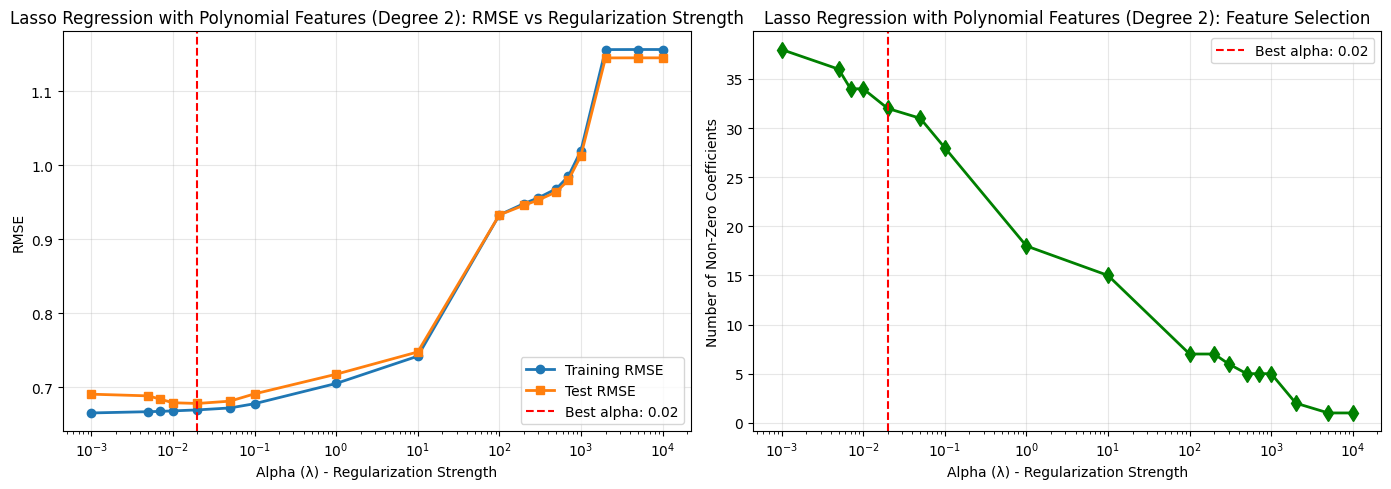


COMPREHENSIVE COMPARISON: All Models
Linear Regression Test RMSE:              0.7456
Ridge Regression Test RMSE:               0.7377 (alpha=500)


NameError: name 'lasso_rmse_test' is not defined

In [28]:
# Lasso Regression with Polynomial Features (Degree 2)
from sklearn.linear_model import Lasso

# Create polynomial features (degree 2)
poly_lasso = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_lasso = poly_lasso.fit_transform(X_train)
X_test_poly_lasso = poly_lasso.transform(X_test)

print(f"Polynomial features created: {X_train_poly_lasso.shape[1]} features from {X_train.shape[1]} original features")

# Train Lasso regression model with different lambda values
lasso_poly_models = []
lasso_poly_rmse_train = []
lasso_poly_rmse_test = []
lasso_poly_non_zero_coef = []

for alpha in alphas:
    lasso_poly = Lasso(alpha=alpha, max_iter=10000)
    lasso_poly.fit(X_train_poly_lasso, y_train)
    lasso_poly_models.append(lasso_poly)
    
    # Predictions
    y_train_pred = lasso_poly.predict(X_train_poly_lasso)
    y_test_pred = lasso_poly.predict(X_test_poly_lasso)
    
    # Calculate RMSE
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
    
    lasso_poly_rmse_train.append(train_rmse)
    lasso_poly_rmse_test.append(test_rmse)
    
    # Count non-zero coefficients (feature selection)
    non_zero = np.sum(lasso_poly.coef_ != 0)
    lasso_poly_non_zero_coef.append(non_zero)

# Find best alpha
best_alpha_lasso_poly_idx = np.argmin(lasso_poly_rmse_test)
best_alpha_lasso_poly = alphas[best_alpha_lasso_poly_idx]
best_lasso_poly_model = lasso_poly_models[best_alpha_lasso_poly_idx]

print("\nLasso Regression (Polynomial Degree 2) Results")
print("=" * 60)
print("Alpha | Train RMSE | Test RMSE | Non-Zero Coefficients")
print("-" * 60)
for i, alpha in enumerate(alphas):
    print(f"{alpha:>6.3f} | {lasso_poly_rmse_train[i]:>10.4f} | {lasso_poly_rmse_test[i]:>9.4f} | {lasso_poly_non_zero_coef[i]:>19}")

print(f"\nBest alpha: {best_alpha_lasso_poly}")
print(f"Best test RMSE: {lasso_poly_rmse_test[best_alpha_lasso_poly_idx]:.4f}")
print(f"Features selected (non-zero coefficients): {lasso_poly_non_zero_coef[best_alpha_lasso_poly_idx]} out of {X_train_poly_lasso.shape[1]}")

# Plot Lasso with Polynomial Features RMSE vs Alpha
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# RMSE plot
ax1.plot(alphas, lasso_poly_rmse_train, marker='o', label='Training RMSE', linewidth=2)
ax1.plot(alphas, lasso_poly_rmse_test, marker='s', label='Test RMSE', linewidth=2)
ax1.axvline(x=best_alpha_lasso_poly, color='red', linestyle='--', label=f'Best alpha: {best_alpha_lasso_poly}')
ax1.set_xlabel('Alpha (λ) - Regularization Strength')
ax1.set_ylabel('RMSE')
ax1.set_title('Lasso Regression with Polynomial Features (Degree 2): RMSE vs Regularization Strength')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Non-zero coefficients plot
ax2.plot(alphas, lasso_poly_non_zero_coef, marker='d', color='green', linewidth=2, markersize=8)
ax2.axvline(x=best_alpha_lasso_poly, color='red', linestyle='--', label=f'Best alpha: {best_alpha_lasso_poly}')
ax2.set_xlabel('Alpha (λ) - Regularization Strength')
ax2.set_ylabel('Number of Non-Zero Coefficients')
ax2.set_title('Lasso Regression with Polynomial Features (Degree 2): Feature Selection')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare all models
print("\n" + "=" * 70)
print("COMPREHENSIVE COMPARISON: All Models")
print("=" * 70)
print(f"Linear Regression Test RMSE:              {rmse:.4f}")
print(f"Ridge Regression Test RMSE:               {ridge_rmse_test[best_alpha_idx]:.4f} (alpha={best_alpha})")
print(f"Lasso Regression Test RMSE:               {lasso_rmse_test[best_alpha_lasso_idx]:.4f} (alpha={best_alpha_lasso})")
print(f"Ridge with Polynomial (Deg 2) Test RMSE: {ridge_poly_rmse_test[best_alpha_poly_idx]:.4f} (alpha={best_alpha_poly})")
print(f"Lasso with Polynomial (Deg 2) Test RMSE: {lasso_poly_rmse_test[best_alpha_lasso_poly_idx]:.4f} (alpha={best_alpha_lasso_poly})")

COEFFICIENT COMPARISON: Polynomial vs Ridge vs Lasso (Polynomial Degree 2)

--- Normal Polynomial Model (Top 20 Features by Absolute Coefficient) ---
                Feature  Coefficient
3             AveBedrms   -38.323120
0                MedInc   -11.936768
6              Latitude     8.284640
2              AveRooms     7.884154
7             Longitude     5.709792
5              AveOccup     1.017431
1              HouseAge    -0.842630
32   AveBedrms Latitude    -0.528063
33  AveBedrms Longitude    -0.486724
29          AveBedrms^2     0.264009
14      MedInc Latitude    -0.163992
15     MedInc Longitude    -0.153483
11     MedInc AveBedrms    -0.145653
27    AveRooms Latitude     0.106560
24   AveRooms AveBedrms    -0.105964
42   Latitude Longitude     0.101543
28   AveRooms Longitude     0.100057
31   AveBedrms AveOccup    -0.080086
41           Latitude^2     0.057657
10      MedInc AveRooms     0.039547

Total non-zero coefficients: 44 (all features used)
Max coefficient: 38.

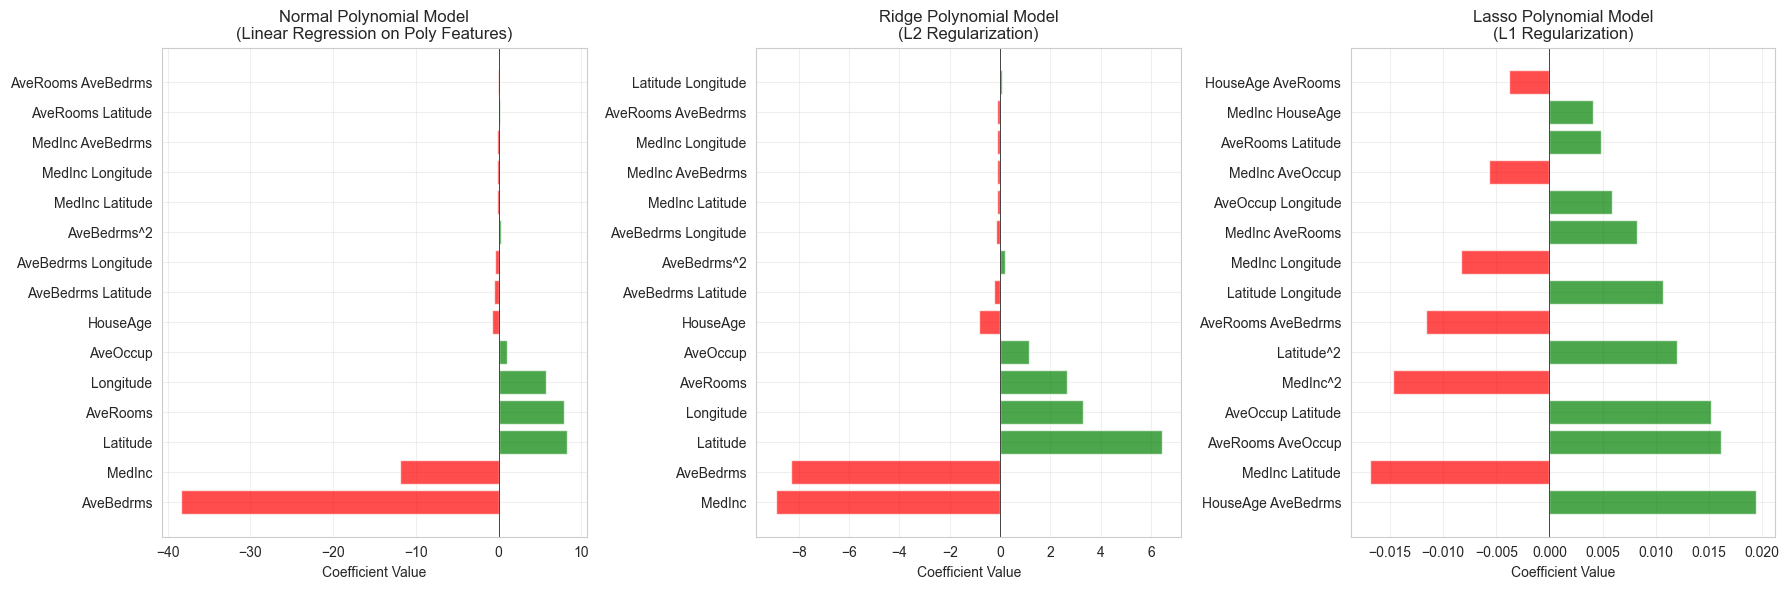

In [ ]:
# Compare Coefficients: Polynomial vs Ridge vs Lasso
# Extract feature names for polynomial features
feature_names_poly = poly_ridge.get_feature_names_out(california_housing.feature_names)

# Get top 20 features by absolute value for visualization
# Normal Polynomial Model (Linear Regression on polynomial features)
poly_linear_coef = poly_model.coef_
poly_linear_df = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': poly_linear_coef
})
poly_linear_df['Abs_Coefficient'] = poly_linear_df['Coefficient'].abs()
poly_linear_top20 = poly_linear_df.nlargest(20, 'Abs_Coefficient')

# Ridge Polynomial Model
ridge_poly_coef = best_ridge_poly_model.coef_
ridge_poly_df = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': ridge_poly_coef
})
ridge_poly_df['Abs_Coefficient'] = ridge_poly_df['Coefficient'].abs()
ridge_poly_top20 = ridge_poly_df.nlargest(20, 'Abs_Coefficient')

# Lasso Polynomial Model
lasso_poly_coef = best_lasso_poly_model.coef_
lasso_poly_df = pd.DataFrame({
    'Feature': feature_names_poly,
    'Coefficient': lasso_poly_coef
})
lasso_poly_df['Abs_Coefficient'] = lasso_poly_df['Coefficient'].abs()
lasso_poly_top20 = lasso_poly_df.nlargest(20, 'Abs_Coefficient')

print("=" * 80)
print("COEFFICIENT COMPARISON: Polynomial vs Ridge vs Lasso (Polynomial Degree 2)")
print("=" * 80)

print("\n--- Normal Polynomial Model (Top 20 Features by Absolute Coefficient) ---")
print(poly_linear_top20[['Feature', 'Coefficient']])
print(f"\nTotal non-zero coefficients: {np.sum(poly_linear_coef != 0)} (all features used)")
print(f"Max coefficient: {np.max(np.abs(poly_linear_coef)):.6f}")
print(f"Mean coefficient: {np.mean(np.abs(poly_linear_coef)):.6f}")

print("\n--- Ridge Polynomial Model (Top 20 Features by Absolute Coefficient) ---")
print(ridge_poly_top20[['Feature', 'Coefficient']])
print(f"\nTotal non-zero coefficients: {np.sum(ridge_poly_coef != 0)} (all features used)")
print(f"Max coefficient: {np.max(np.abs(ridge_poly_coef)):.6f}")
print(f"Mean coefficient: {np.mean(np.abs(ridge_poly_coef)):.6f}")

print("\n--- Lasso Polynomial Model (Top 20 Features by Absolute Coefficient) ---")
print(lasso_poly_top20[['Feature', 'Coefficient']])
print(f"\nTotal non-zero coefficients: {np.sum(lasso_poly_coef != 0)}")
print(f"Max coefficient: {np.max(np.abs(lasso_poly_coef)):.6f}")
print(f"Mean coefficient: {np.mean(np.abs(lasso_poly_coef[lasso_poly_coef != 0])):.6f}")

# Visualization: Side-by-side comparison of top 15 features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Normal Polynomial
top15_normal = poly_linear_top20.head(15)
colors_normal = ['green' if x > 0 else 'red' for x in top15_normal['Coefficient']]
axes[0].barh(top15_normal['Feature'], top15_normal['Coefficient'], color=colors_normal, alpha=0.7)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Normal Polynomial Model\n(Linear Regression on Poly Features)')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3)

# Ridge Polynomial
top15_ridge = ridge_poly_top20.head(15)
colors_ridge = ['green' if x > 0 else 'red' for x in top15_ridge['Coefficient']]
axes[1].barh(top15_ridge['Feature'], top15_ridge['Coefficient'], color=colors_ridge, alpha=0.7)
axes[1].set_xlabel('Coefficient Value')
axes[1].set_title('Ridge Polynomial Model\n(L2 Regularization)')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3)

# Lasso Polynomial
top15_lasso = lasso_poly_top20.head(15)
colors_lasso = ['green' if x > 0 else 'red' for x in top15_lasso['Coefficient']]
axes[2].barh(top15_lasso['Feature'], top15_lasso['Coefficient'], color=colors_lasso, alpha=0.7)
axes[2].set_xlabel('Coefficient Value')
axes[2].set_title('Lasso Polynomial Model\n(L1 Regularization)')
axes[2].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Gradient Descent**

Gradient descent is an optimization algorithm used to minimize the loss function in machine learning models. It is one of the most fundamental and widely-used optimization techniques in deep learning and machine learning.

**How Gradient Descent Works:**

The algorithm works by iteratively adjusting the model's parameters (weights) in the direction that reduces the loss function. The key steps are:

1. **Initialize weights** with random values
2. **Calculate the gradient** - the slope of the loss function with respect to each weight
3. **Update weights** by moving in the opposite direction of the gradient (downhill)
4. **Repeat** steps 2-3 until convergence

The update rule for each weight is:
$$w_{\text{new}} = w_{\text{old}} - \alpha \cdot \frac{\partial \text{Loss}}{\partial w}$$

Where:
- **α (alpha)** = learning rate (controls step size)
- **∂Loss/∂w** = gradient (partial derivative of loss with respect to weight)

**Learning Rate:**
- **Too small:** The algorithm converges slowly, requiring many iterations
- **Too large:** The algorithm may overshoot the minimum and diverge, never converging
- **Just right:** The algorithm finds the minimum efficiently

**Types of Gradient Descent:**

1. **Batch Gradient Descent:** Uses all training samples to compute the gradient (stable but slow)
2. **Stochastic Gradient Descent (SGD):** Uses one sample at a time (fast but noisy)
3. **Mini-batch Gradient Descent:** Uses a small batch of samples (balance between speed and stability)

**Important Considerations:**

- Gradient descent can get stuck in local minima (especially for non-convex loss functions like in deep learning)
- The shape of the loss function landscape determines how well gradient descent performs
- Normalization/scaling of features can significantly improve gradient descent convergence
- Momentum and adaptive learning rates (like Adam optimizer) can improve convergence speed

In linear regression, the loss function (MSE) is convex, so gradient descent will always find the global minimum.

**Hyperparameters in Regression**

Hyperparameters are configuration settings that are set before training a machine learning model. Unlike model parameters (like weights and biases) which are learned during training, hyperparameters are chosen by the data scientist and control the learning process.

**Common Hyperparameters in Regression:**

1. **Learning Rate (α)**
   - Controls the size of steps taken during gradient descent
   - Affects convergence speed and final model quality
   - Too high: may overshoot the minimum
   - Too low: slow convergence, requires many iterations

2. **Regularization Strength (λ - lambda)**
   - Used in Ridge and Lasso regression
   - Controls the penalty applied to large coefficients
   - Higher λ: simpler model, more bias, less variance
   - Lower λ: more complex model, less bias, more variance

3. **Regularization Type**
   - **L2 (Ridge):** Shrinks coefficients toward zero, rarely eliminates them
   - **L1 (Lasso):** Can shrink coefficients to exactly zero, performs feature selection
   - **Elastic Net:** Combination of L1 and L2 regularization

4. **Polynomial Degree**
   - Determines the complexity of the polynomial features
   - Higher degree: more flexible model, risk of overfitting
   - Lower degree: simpler model, risk of underfitting

5. **Train-Test Split Ratio**
   - Determines what fraction of data is used for training vs testing
   - Common split: 80% training, 20% testing

6. **Batch Size** (in gradient descent)
   - Number of samples used to compute each gradient update
   - Affects convergence speed and stability

7. **Number of Iterations (Epochs)**
   - How many times the algorithm passes through the entire training dataset
   - More iterations: better convergence, more computation time

**Hyperparameter Tuning:**

Finding the best hyperparameters is crucial for model performance. Common techniques include:

- **Grid Search:** Test all combinations of hyperparameter values
- **Random Search:** Randomly sample hyperparameter combinations
- **Bayesian Optimization:** Use probabilistic model to guide search
- **Cross-Validation:** Evaluate model on multiple train-test splits to reduce variance in hyperparameter selection

**Why Hyperparameter Tuning Matters:**

The same model can perform very differently with different hyperparameters. Good hyperparameter tuning can:
- Improve model accuracy
- Reduce overfitting or underfitting
- Decrease training time
- Make the model more robust to new data

**Sannas Interpretation**

When performing regression analysis sklearn is very useful, both for splitting the data into training and test (and maybe cross-validation) but also for performing the gradient descent needed to get the actual regression model. This is the most important to know.

However, a regression model can be made more complex with polynomial features, and overfitting can be prevented with L1 (lasso) and L2 (ridge) regularization.

When improving a model it is important to think about hyperparameters.

It is also important to know that the quality of the model depend on the quality of the data, it is important to clean the data and prevent data-leakage and also normalize the data.

Below are the steps (written by AI) that can be used to create a model, step by step. I think a systematic, step by step approach is important to use when performing an actual project.

**Steps to Build a Regression Model**

Building a successful regression model requires a systematic approach. Follow these steps:

1. **Problem Definition**
   - Clearly define the business problem
   - Identify the target variable (what you want to predict)
   - Understand the data requirements
   - Set success metrics and evaluation criteria

2. **Data Collection**
   - Gather relevant data from reliable sources
   - Ensure sufficient data volume for training
   - Document data sources and collection methods

3. **Exploratory Data Analysis (EDA)**
   - Load and examine the data
   - Check data shape, types, and basic statistics
   - Visualize distributions and relationships
   - Identify patterns, trends, and outliers

4. **Data Cleaning**
   - Handle missing values (remove or impute)
   - Detect and handle outliers
   - Remove duplicate records
   - Fix data type issues
   - Correct invalid or inconsistent values

5. **Feature Engineering**
   - Create new features from existing ones
   - Select relevant features
   - Transform features (log, polynomial, etc.)
   - Handle categorical variables (encoding)
   - Scale/normalize numerical features

6. **Data Splitting**
   - Split data into training and test sets (typically 80/20 or 70/30)
   - Ensure no data leakage between sets
   - Consider stratification for specific cases

7. **Model Selection**
   - Choose appropriate regression algorithm
   - Consider model complexity vs simplicity
   - Start with simple models before complex ones
   - Examples: Linear Regression, Ridge, Lasso, Polynomial, etc.

8. **Hyperparameter Tuning**
   - Identify key hyperparameters for your model
   - Use grid search, random search, or Bayesian optimization
   - Use cross-validation for robust evaluation
   - Select hyperparameters with best validation performance

9. **Model Training**
   - Train the model on training data
   - Monitor training progress
   - Ensure convergence (if using iterative algorithms)

10. **Model Evaluation**
    - Evaluate on test set using appropriate metrics (RMSE, R², MAE, etc.)
    - Calculate training and test errors
    - Check for overfitting or underfitting
    - Compare with baseline models

11. **Feature Importance Analysis**
    - Examine which features contribute most to predictions
    - Remove irrelevant or low-impact features
    - Verify model interpretability

12. **Visualization and Interpretation**
    - Plot predicted vs actual values
    - Visualize residuals (prediction errors)
    - Create feature importance plots
    - Generate summary statistics and reports

13. **Model Refinement**
    - If performance is poor, revisit previous steps
    - Try different algorithms or hyperparameters
    - Add or remove features
    - Collect more data if needed

14. **Final Model Validation**
    - Perform cross-validation for robustness
    - Test on multiple independent test sets if available
    - Validate assumptions (for linear regression)
    - Document model performance and limitations

15. **Deployment and Monitoring**
    - Save the trained model
    - Create prediction pipeline
    - Monitor performance on new data
    - Retrain model periodically if performance degrades

**Tips for Success:**
- Document your entire process for reproducibility
- Use version control for code and data
- Validate assumptions of your chosen algorithm
- Always start simple and add complexity only when needed
- Keep business context in mind when interpreting results